# Data Cleaning

In [542]:

import os
import pandas as pd
import numpy as np
import xlsxwriter
os.getcwd()


#importing films raw data for processing and transforming 
films = pd.read_csv("/Users/aminbaabol/Desktop/PD/Personal_Projects/Movie_Recommendation/film_data.csv")

#creating an empty file to be populated with processed films data
workbook = xlsxwriter.Workbook('CleanFilmsData.xlsx',{'nan_inf_to_errors': True})
worksheet = workbook.add_worksheet()

worksheet.write('A1', 'Film Title')
worksheet.write('B1', 'Release Year')
worksheet.write('C1', 'Film Rating')
worksheet.write('D1', 'Genre')
worksheet.write('E1', 'Box Office')
worksheet.write('F1', 'Run Time(min)')
worksheet.write('G1', 'Stars')

#We'll add the iterated film titles into this empty set and use it to check for any duplicates
duplicateCheck = set()

#writing a while loop to automate processing the raw data and populating the empty file with processed data
i=1
while (i<=1000):
    
    #Movie title
    #parsing row one,first column: first we split the raw title into by period then split by parenthesis, then select the first element of the splitted strinng
    Film_Title = films['Movie Title'].iloc[i-1].split(".")[1].split('(')[0]
    if Film_Title not in duplicateCheck:
        if('(' in (films['Movie Title'].iloc[i-1])):
            release_date = films['Movie Title'].iloc[i-1].split('(')[-1]
            Release_Year = int(release_date[:-1])
        else:
            Release_Year = 'NaN'

        #Movie Rating
        #we are splitting the string by space then we're selecting the first element to keep
        Film_Rating = float(films['Movie Rating'].iloc[i-1].split(" ")[0])

        #Thank goodness we are don't have to do anything for the Genre column
        Genre = films['Genre'].iloc[i-1]
        #Box Office
        #We are spliting first row, box office column by ":" then selecting the second element of the subsquent array
        Box_Office = films['Box Office'].iloc[i-1] #.splirt(":")[2]
        if len(Box_Office) > 0:
            Box_Office2 = films['Box Office'].iloc[i-1].split("$")
            if len(Box_Office2) == 2:
                Box_Office = Box_Office2[1]
                Box_Office = Box_Office[:-1]
                Box_Office = float(Box_Office)
            else:
                Box_Office = np.nan
    #             if Box_Office2[0] in ("Votes:"):
    #                 Box_Office = "NaN"
    #             else:
    #                 Box_Office = Box_Office2[0]
    #                 Box_Office = Box_Office[:-1]

        #Run Time
        #We are removing the "min" from the column and indicate in the column header the unit will be in minutes
        Run_Time = int(films['Run Time(min)'].iloc[i].split(" ")[0])

        #Stars:
        #we are splitting the string chuck by ":" then select the second element that contains the stars names to keep
        Stars = films['Stars'].iloc[i-1].split(":")[2]

        #populating the empty cells with the parsed elements from the raw data
        worksheet.write('A'+str(i+1), Film_Title)
        worksheet.write('B'+str(i+1), Release_Year)
        worksheet.write('C'+str(i+1), Film_Rating)
        worksheet.write('D'+str(i+1), Genre)
        worksheet.write('E'+str(i+1), Box_Office)
        worksheet.write('F'+str(i+1), Run_Time)
        worksheet.write('G'+str(i+1), Stars)
        i+=1

workbook.close()

# Data Wrangling

In [545]:
# # checking if there are any NaN values in any of the column features
# title_column = myData['Movie Title'].isnull().values.any()
# year_column = myData['Release Year'].isnull().values.any()
# rating_column = myData['Film Rating'].isnull().values.any()
# genre_column = myData['Genre'].isnull().values.any()
# box_office_column = myData['Box Office'].isnull().values.any()
# run_time_column = myData['Run Time(min)'].isnull().values.any()
# stars_column = myData['Stars'].isnull().values.any()
# # print (title_column)
# # print (year_column)
# # print (rating_column)
# # print (genre_column)
# # print (box_office_column)
# # print (run_time_column)
# # print (stars_column)

# #Box Office column contains NaN values, we will now add up all the NaN values in that column 
# # and divide by the total entries of the column *100 to see if NaN values are less than 5% of the data in that column
# Box_Office_NA_Values = myData['Box Office'].isnull().sum()
# print(Box_Office_NA_Sum)
# Box_Office_Total_Entries = myData['Box Office'].count()
# print(Box_Office_Total_Entries)

# #checking how  Statistically significant the missing values are

# NaN_Check = (Box_Office_NA_Values/Box_Office_Total_Entries)*100
# print(round(NaN_Check,2),"%")

# #since the significance of the missing values is more than 5%, we can't simply drop them, we must find an imputation method to best estimate those missing values
# #checking the data distribution to help us make assumptions for the estimation method we choose



# Imputing missing values

In [559]:
import numpy as np

from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

myData = pd.read_excel("/Users/aminbaabol/Desktop/PD/Personal_Projects/Movie_Recommendation/CleanFilmsData.xlsx")

#replacing the missing values with the mean of the column which contains the missing values
Box_Office_mean = round(myData['Box Office'].mean(),2)
myData['Box Office'] = myData['Box Office'].replace(np.nan,round(Box_Office_mean,2))
myData['Genre'] = myData['Genre'].str.replace('-', '')
myData.rename(columns={'Film Title':'title',
                       'Release Year':'year',
                       'Film Rating':'rating',
                      'Box Office':'revenue'},
                      inplace=True)
myData.to_excel('TransformedData.xlsx')

# Data Visualization

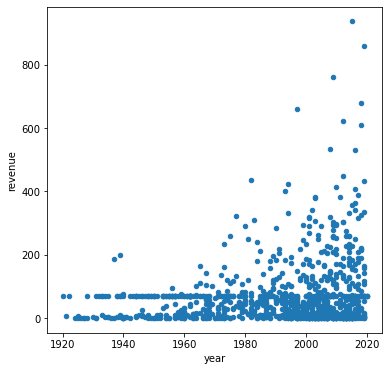

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
myData = pd.read_excel("/Users/aminbaabol/Desktop/PD/Personal_Projects/Movie_Recommendation/TransformedData.xlsx")
# the plot looks like some sort of distribution. Therefore, my options for 
myData.plot(kind='scatter',x='year', y='revenue', figsize=(6,6))


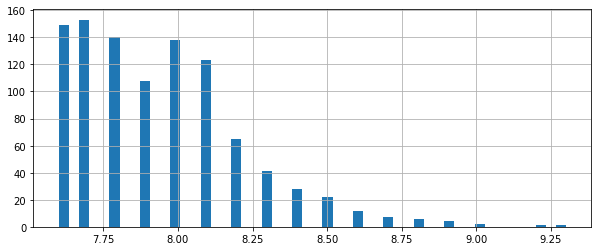

In [9]:
# plot graph of 'ratings' column 
plt.figure(figsize =(10, 4)) 
myData['rating'].hist(bins = 50) 

# Building the ML model


#We are going to build a that recommends movies that are similar to a particular movie. To achieve this, we compute pairwise cosine similarity scores for all movies based on Film Rating, Genre, and notable stars and then recommend movies based on that similarity score threshold.

[Text(0, 0.5, 'Genre'), Text(0.5, 0, 'Movie Count')]

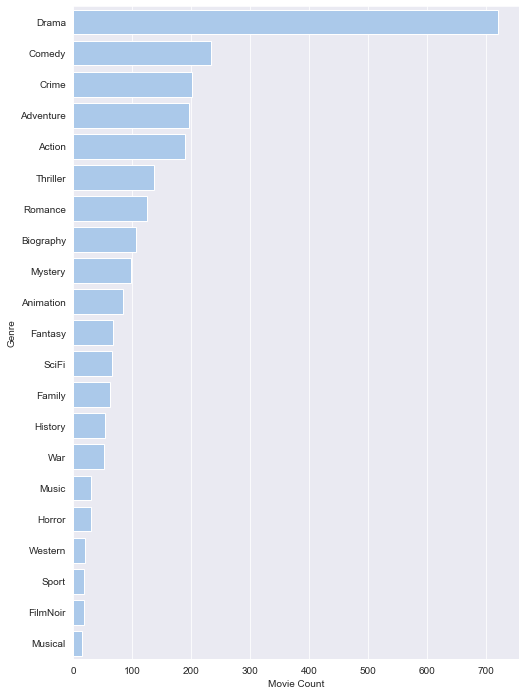

In [13]:
import numpy as np 
import pandas as pd
import itertools
import collections
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import jaccard_score

myData = pd.read_excel("/Users/aminbaabol/Desktop/PD/Personal_Projects/Movie_Recommendation/TransformedData.xlsx")

myData['genre'] = myData['genre'].fillna('None') # filling 'empty' data
myData['genre'] = myData['genre'].apply(lambda x: x.split(', ')) # split genre into list of individual genre

genre_data = itertools.chain(*myData['genre'].values.tolist()) # flatten the list
genre_counter = collections.Counter(genre_data)

genres = pd.DataFrame.from_dict(genre_counter, orient='index').reset_index().rename(columns={'index':'genre', 0:'count'})
genres.sort_values('count', ascending=False, inplace=True)

# Plot genre
f, ax = plt.subplots(figsize=(8, 12))
sns.set_color_codes("pastel")
sns.set_style("darkgrid")
sns.barplot(x="count", y="genre", data=genres, color='b')
ax.set(ylabel='Genre',xlabel="Movie Count")



In [14]:
genre_map = {genre: idx for idx, genre in enumerate(genre_counter.keys())}

def extract_feature(genre):
    feature = np.zeros(len(genre_map.keys()), dtype=int)
    feature[[genre_map[idx] for idx in genre]] += 1
    return feature
    
movie_feature = pd.concat([myData['title'], myData['genre']], axis=1)
movie_feature['genre'] = movie_feature['genre'].apply(lambda x: extract_feature(x))
print(movie_feature.head(80))

                                              title  \
0                         The Shawshank Redemption    
1                                    The Godfather    
2                                  The Dark Knight    
3                           The Godfather: Part II    
4    The Lord of the Rings: The Return of the King    
..                                              ...   
75                                           Alien    
76                                    High and Low    
77                                               Dr   
78                     Witness for the Prosecution    
79                                  Paths of Glory    

                                                genre  
0   [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1   [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2   [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
3   [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
4   [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
.. 

In [19]:
test_data = movie_feature.take([1])
for row in test_data.iterrows():
    print('Similar movie like {}:'.format(row[1]['title']))
    search = movie_feature.drop([row[0]]) # drop current movie
    search['result'] = search['genre'].apply(lambda x: jaccard_score(row[1]['genre'], x))
    search_result = search.sort_values('result', ascending=False)['title'].head(25)
    for res in search_result.values:
        print('\t{}'.format(res))
    print()

Similar movie like  The Godfather :
	 Dogville 
	 The Godfather: Part III 
	 To Kill a Mockingbird 
	 Blood In, Blood Out 
	 Casino 
	 Drive 
	 Breathless 
	 Lilya 4-Ever 
	 Leviathan 
	 City of God 
	 Shoplifters 
	 The 400 Blows 
	 Cool Hand Luke 
	 This Is England 
	 12 Angry Men 
	 Scarface 
	 The Godfather: Part II 
	 Once Were Warriors 
	 Pulp Fiction 
	 A Prophet 
	 Taxi Driver 
	 Boyz n the Hood 
	 Once Upon a Time in America 
	 La Haine 
	 Once Upon a Time in Anatolia 

